In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\libin_urv2w13\\Desktop\\mljourney\\Supervised-ML\\Classification\\Feature-Engineering\\grade-prediction\\synthetic_student_performance.csv.xls")

In [3]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [4]:
df[df.duplicated()]

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass


In [5]:
df.drop(columns=["StudentID","GPA"],inplace=True)
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GradeClass'],
      dtype='object')

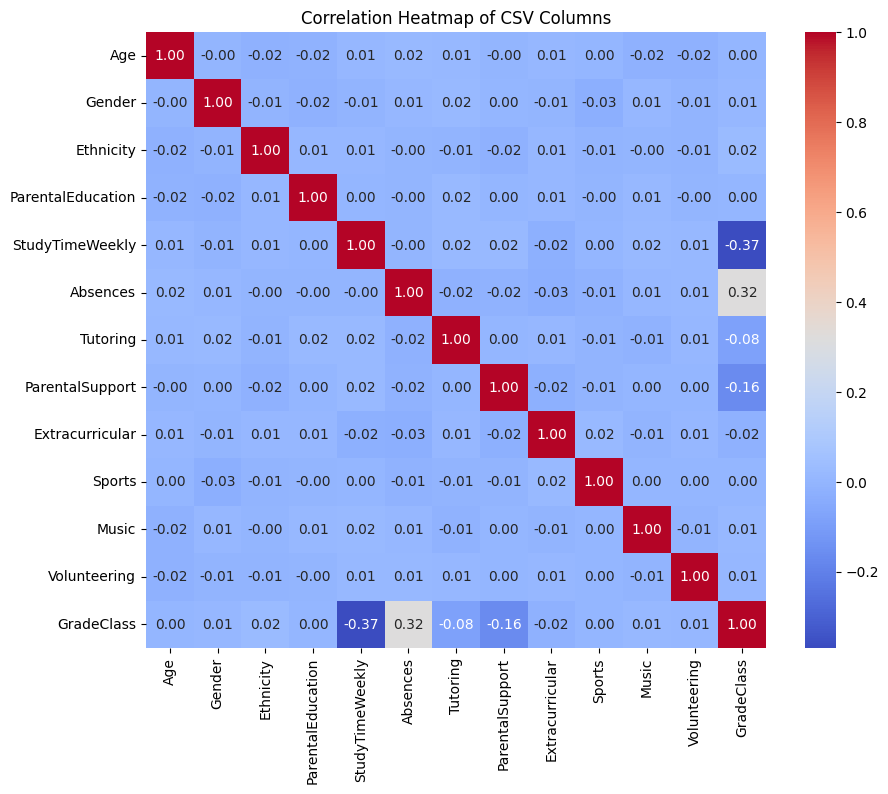

In [6]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of CSV Columns')
plt.show()

In [7]:
x = df[["StudyTimeWeekly","Absences","Tutoring","ParentalSupport","Extracurricular"]]
y = df["GradeClass"]
y

0       1
1       2
2       0
3       1
4       1
       ..
4995    0
4996    2
4997    0
4998    0
4999    3
Name: GradeClass, Length: 5000, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy",splitter="best")
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)

35.9


In [11]:
params = {
    "criterion":['gini', 'entropy', 'log_loss'],
    "splitter":['best', 'random']
}

In [12]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(dt,params,cv=10)
gs.fit(x_train,y_train)
gs.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)


0.398

In [14]:
x.head(3)

,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular
0,16,13,0,2,0
1,17,28,0,2,1
2,13,18,1,4,0


In [15]:
y.head(3)

0    1
1    2
2    0
Name: GradeClass, dtype: int64

In [16]:
new_student = [[16,13,0,2,0]]
result = dt.predict(scaler.transform(new_student))[0] # Takes the only value form result list [1]
grade_map = {0:"A",1:"B",2:"C",3:"D"}
print(grade_map.get(result))


B


c:\Users\libin_urv2w13\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
# to integrate with UI we need to import model and scaler
import joblib
joblib.dump(dt,"dt_model.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']